In [1518]:
# importing some libs so that we can work with data easily :)
# all of the compution is done on colab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1519]:
# reading the csv file by using pandas :)
df = pd.read_csv('/workspaces/Ahmedabad-Flat-Price-/dataset/ahmedabad.csv' , encoding='utf-8')

In [1520]:
df.index

RangeIndex(start=0, stop=6853, step=1)

In [1521]:
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Unnamed: 0      0.000000
Title           0.000000
type_area       0.000000
value_area      0.000000
status          0.000000
floor           0.116737
transaction     0.306435
furnishing      0.539910
facing          1.298701
price           0.000000
price_sqft      6.537283
description    25.769736
dtype: float64


# all the data cleaning and feature engineering

In [1522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6853 entries, 0 to 6852
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   6853 non-null   int64 
 1   Title        6853 non-null   object
 2   type_area    6853 non-null   object
 3   value_area   6853 non-null   object
 4   status       6853 non-null   object
 5   floor        6845 non-null   object
 6   transaction  6832 non-null   object
 7   furnishing   6816 non-null   object
 8   facing       6764 non-null   object
 9   price        6853 non-null   object
 10  price_sqft   6405 non-null   object
 11  description  5087 non-null   object
dtypes: int64(1), object(11)
memory usage: 642.6+ KB


In [1523]:
df.isnull().sum()

Unnamed: 0        0
Title             0
type_area         0
value_area        0
status            0
floor             8
transaction      21
furnishing       37
facing           89
price             0
price_sqft      448
description    1766
dtype: int64

In [1524]:
df.duplicated().sum()
df = df.drop_duplicates()

In [1525]:
df['price_sqft'].isnull().sum()

np.int64(448)

In [1526]:
# DROP the description
df = df.drop(['description', 'Unnamed: 0'], axis=1)

In [1527]:
# quick look into the data-set :)
df.head(5)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",Super Area,155 sqyrd,Poss. by Dec '26,New Property,Unfurnished,Vivaan Aura,2,â‚¹48.1 Lac,"â‚¹3,444 per sqft"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",Carpet Area,710 sqft,Poss. by Jun '27,New Property,Unfurnished,SP Epitome,2,â‚¹50 Lac,"â‚¹3,876 per sqft"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",Carpet Area,588 sqft,Poss. by Dec '25,New Property,Unfurnished,Pacifica Amara,2,â‚¹40 Lac,"â‚¹3,738 per sqft"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",Carpet Area,687 sqft,Poss. by Jun '26,New Property,Unfurnished,Kavisha AER,2,â‚¹48.8 Lac,"â‚¹3,900 per sqft"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",Carpet Area,621 sqft,Poss. by Mar '25,New Property,Unfurnished,Aarambh Vistara,2,â‚¹48 Lac,"â‚¹4,248 per sqft"


In [1528]:
import re
def clean_price(val):
    if pd.isna(val):
        return np.nan
    val = str(val).strip()

    return re.sub(r'^[^0-9A-Za-z]+','',val)


def price_conversion(val):
    if 'Lac' in val:
        return float(val.replace('Lac', "").strip()) *1e5
    elif "Cr" in val:
        return float(val.replace('Cr', "").strip()) *1e7
    elif "Call for Price" in val:
        return str(val.strip())
    else:
        return float(val.strip())



df['price'] = df['price'].apply(clean_price)
df['price'] = df['price'].apply(price_conversion)

In [1529]:
df['type_area'].unique()

array(['Super Area', 'Carpet Area', 'Transaction', 'Status', 'Built Area',
       'Under Construction'], dtype=object)

In [1530]:
df['type_area'] = df['type_area'].replace({
    "Super Area": 'super area',
    'Carpet Area': 'carpet area',
    'Transaction': np.nan,
    'Status': np.nan,
    'Under Construction': 'under construction'
} )

df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [1531]:
print(list(df['status'].unique()))

["Poss. by Dec '26", "Poss. by Jun '27", "Poss. by Dec '25", "Poss. by Jun '26", "Poss. by Mar '25", "Poss. by Jul '24", "Poss. by Jul '26", "Poss. by Dec '24", 'Ready to Move', "Poss. by May '26", "Poss. by Nov '24", "Poss. by Oct '25", "Poss. by Jan '26", "Poss. by Aug '24", "Poss. by Oct '24", "Poss. by Feb '28", "Poss. by Sep '25", "Poss. by Mar '26", "Poss. by Jan '25", "Poss. by Nov '25", "Poss. by Dec '27", "Poss. by Sep '24", '4 out of 5', '1 out of 1', '3 out of 3', '3 out of 5', '3 out of 4', "Poss. by Jun '25", '4 out of 10', '4 out of 4', 'Bapunagar One', '2 out of 3', '3 out of 9', '7 out of 8', "Poss. by Jun '24", '5 out of 5', '1 out of 4', '1 out of 14', '13 out of 13', '2 out of 5', '9 out of 14', '8 out of 14', "Poss. by Mar '27", "Poss. by Jul '25", "Poss. by May '24", "Poss. by Aug '25", "Poss. by Feb '25", "Poss. by Apr '25", "Poss. by Dec '28", "Poss. by Apr '26", "Poss. by Nov '26", "Poss. by Nov '27", "Poss. by Sep '26", "Poss. by Aug '26", "Poss. by Jul '27", "

In [1532]:
def status_clean(val):
    val = str(val)

    if "Poss." in val or val in  ["Ready to Move", "New Property"] or 'out of' in val or 'Const. Age' in val:
        return ("ready")
    
    else:
        return 'not ready'
    

df[['status']] = df['status'].apply(status_clean).apply(pd.Series)

In [1533]:
df['status'].unique()

array(['ready', 'not ready'], dtype=object)

In [1534]:

# df.sample()
# df['facing'].unique()

In [1535]:
# it is to check the no of rows and columns in the data-set :)
x = df.shape
print('This data-set has', x[0] , "rows" , 'and' ,x[-1] , "columns")

This data-set has 6853 rows and 10 columns


In [1536]:
# we can also need to check data type so there are some couple of ways for it w'll use .dtype method for now
print('data type of the data present in the columns are give below')
print('')
print(df.dtypes)

data type of the data present in the columns are give below

Title          object
type_area      object
value_area     object
status         object
floor          object
transaction    object
furnishing     object
facing         object
price          object
price_sqft     object
dtype: object


In [1537]:
# null values per column
df.isnull().sum()

Title            0
type_area        4
value_area       0
status           0
floor            8
transaction     21
furnishing      37
facing          89
price            0
price_sqft     448
dtype: int64

In [1538]:
df.duplicated().sum()

np.int64(186)

In [1539]:
df = df.drop_duplicates()

In [1540]:
df['type_area'].unique()

array(['super area', 'carpet area', nan, 'Built Area',
       'under construction'], dtype=object)

In [1541]:
# missing values :)
print("missing values in data-set in '%'")
print("")
print(f"{(df.isnull().mean())*100}")

missing values in data-set in '%'

Title          0.000000
type_area      0.044998
value_area     0.000000
status         0.000000
floor          0.104995
transaction    0.284986
furnishing     0.509975
facing         1.289936
price          0.000000
price_sqft     6.389681
dtype: float64


In [1542]:
df.head()

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,ready,New Property,Unfurnished,Vivaan Aura,2,4810000.0,"â‚¹3,444 per sqft"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,ready,New Property,Unfurnished,SP Epitome,2,5000000.0,"â‚¹3,876 per sqft"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,ready,New Property,Unfurnished,Pacifica Amara,2,4000000.0,"â‚¹3,738 per sqft"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,ready,New Property,Unfurnished,Kavisha AER,2,4880000.0,"â‚¹3,900 per sqft"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,ready,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,"â‚¹4,248 per sqft"


In [1543]:
# not so important but still if you want you can try storing name of fetaures in variable for record :)

columns = list(df.columns)
columns

['Title',
 'type_area',
 'value_area',
 'status',
 'floor',
 'transaction',
 'furnishing',
 'facing',
 'price',
 'price_sqft']

In [1544]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6667 entries, 0 to 6852
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        6667 non-null   object
 1   type_area    6664 non-null   object
 2   value_area   6667 non-null   object
 3   status       6667 non-null   object
 4   floor        6660 non-null   object
 5   transaction  6648 non-null   object
 6   furnishing   6633 non-null   object
 7   facing       6581 non-null   object
 8   price        6667 non-null   object
 9   price_sqft   6241 non-null   object
dtypes: object(10)
memory usage: 572.9+ KB


In [1545]:
df.sample()

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,price_sqft
2490,3 BHK Apartment for Sale in Vedant Shreeji Enc...,carpet area,1600 sqft,ready,1 out of 4,Resale,Unfurnished,"Garden/Park, Main Road",9700000.0,NaN


In [1546]:
df["transaction"].unique()

array(['Unfurnished', 'New Property', 'Resale', 'Semi-Furnished',
       'Furnished', 'Shakti Gardenia', 'Other', nan,
       'Gajanan Dev Home Town 4', 'Karnavati Apartment II',
       'Sangani Platinum', 'Saujanya II', 'Harsh Apartment',
       'Bhagwat Elysium', 'Swati Greens', 'Shivalik Sharda Park View 2',
       'Freehold', 'Harshdip Avadh Elegance', 'Bakeri City', '3',
       'Veer Savarker Heights 2 Vasantnagar', 'Galaxy Gala Laxuria',
       'Garden/Park', 'Orchid Heaven', '14 Covered',
       'Shree Balaji Wind Park', 'Samyak 49', '24 Karat', 'The Indus',
       'Super Shaligram', 'Times 40'], dtype=object)

In [1547]:
df = df.drop(['price_sqft'], axis=1)

In [1548]:
df['Title'][9]

'2 BHK Apartment for Sale in Sun Parkwest, Shela Ahmedabad'

In [1549]:
df.sample(5)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price
6346,"4 BHK Apartment for Sale in Shivalik Edge, Amb...",super area,5500 sqft,ready,12 out of 12,Resale,Unfurnished,East,45100000.0
159,2 BHK Apartment for Sale in Hathijan Ahmedabad,carpet area,420 sqft,ready,Resale,Furnished,"Garden/Park, Pool, Main Road",2,3800000.0
5250,"5 BHK Penthouse for Sale in Super Shaligram, G...",super area,5339 sqft,ready,21 out of 21,New Property,Unfurnished,East,34700000.0
3796,"4 BHK Apartment for Sale in Aaryan Elan, Jagat...",carpet area,2718 sqft,ready,11 out of 14,New Property,Unfurnished,East,14500000.0
1295,2 BHK Builder Floor for Sale in Vastral Ahmedabad,super area,1300 sqft,ready,5 out of 6,Resale,Furnished,2,3000000.0


In [1550]:
# clean columns
# 1 type area ----------------- looks good
# 2 value area ------------ just convert sqft and sqm , sqyrd to one singel type
# 3 floor ----------------- convert to 1/7 or something like it form
# 4 transcations -------------- looks useless so may be drop it
# 5 furnishing -------------------- search google or chatgpt as i cant under stand data
# 6 facing ----------------------- make it direction only  or for good drop it as it is not releivent data
# 7 Flat type(new column from title)----------- like 1 BHK , 2 BHK or other
# 8 loaction or building name ---------- from title (after in and before ,)

# so there will be about 7-8 meaningful columns after this

In [1551]:
def flat_type(text):
    match = re.search(r'(\d+)', text , re.IGNORECASE)
    if match:
        return match.group(0)
    return None


df['BHK'] = df['Title'].apply(flat_type)

In [1552]:
def location(text):
    match = re.search(r'\bin\b\s+(.*)', text , re.IGNORECASE)
    if match:
        return match.group(1)
    return None

df['location'] = df['Title'].apply(location)

In [1553]:
# df.sample(10)

In [1554]:
df.isnull().sum()

Title           0
type_area       3
value_area      0
status          0
floor           7
transaction    19
furnishing     34
facing         86
price           0
BHK            27
location        0
dtype: int64

In [1555]:
df.head(10)

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,BHK,location
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,ready,New Property,Unfurnished,Vivaan Aura,2,4810000.0,2,"Vivaan Aura, Zundal Ahmedabad"
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,ready,New Property,Unfurnished,SP Epitome,2,5000000.0,2,"SP Epitome, Shela Ahmedabad"
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,ready,New Property,Unfurnished,Pacifica Amara,2,4000000.0,2,"Pacifica Amara, Sanand Ahmedabad"
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,ready,New Property,Unfurnished,Kavisha AER,2,4880000.0,2,"Kavisha AER, Shela Ahmedabad"
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,ready,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,2,"Aarambh Vistara, Gota Ahmedabad"
5,"2 BHK Apartment for Sale in Vivaan Essence, Zu...",super area,1413 sqft,ready,New Property,Unfurnished,Vivaan Essence,1 Covered,4990000.0,2,"Vivaan Essence, Zundal Ahmedabad"
6,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,700 sqft,ready,7 out of 14,New Property,Unfurnished,East,4910000.0,2,"Kavisha AER, Shela Ahmedabad"
7,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",carpet area,85 sqyrd,ready,11 out of 14,New Property,Unfurnished,East,4840000.0,2,"Vivaan Aura, Zundal Ahmedabad"
8,"2 BHK Apartment for Sale in Kavisha Atria, She...",carpet area,655 sqft,ready,New Property,Unfurnished,North - East,Garden/Park,4520000.0,2,"Kavisha Atria, Shela Ahmedabad"
9,"2 BHK Apartment for Sale in Sun Parkwest, Shel...",carpet area,676 sqft,ready,5 out of 14,New Property,Unfurnished,East,4260000.0,2,"Sun Parkwest, Shela Ahmedabad"


In [1556]:
df['location'].unique().tolist()

['Vivaan Aura, Zundal Ahmedabad',
 'SP Epitome, Shela Ahmedabad',
 'Pacifica Amara, Sanand Ahmedabad',
 'Kavisha AER, Shela Ahmedabad',
 'Aarambh Vistara, Gota Ahmedabad',
 'Vivaan Essence, Zundal Ahmedabad',
 'Kavisha Atria, Shela Ahmedabad',
 'Sun Parkwest, Shela Ahmedabad',
 'Shilp Ananta, Shela Ahmedabad',
 'Zundal Ahmedabad',
 'Savvy Studioz, Jagatpur Ahmedabad',
 'Devam, Jagatpur Ahmedabad',
 'Orchid Blues, Shela Ahmedabad',
 'Aadhvan Rise, South Bopal, Bopal Ahmedabad',
 'Atlantis wave Ahmedabad',
 'Zaveri Greens, Ghuma Ahmedabad',
 'Mahadev Lavish, South Bopal, Bopal Ahmedabad',
 'Sun Footprints, Shela Ahmedabad',
 'Eden Godrej Garden city, Jagatpur Village, Gota Ahmedabad',
 'Sacred Shivansh, Shela Ahmedabad',
 'Sheladia Eris, Shela Ahmedabad',
 'Shela Ahmedabad',
 'Gota Ahmedabad',
 'HR Eternia, Shela Ahmedabad',
 'Indraprasth Ixora, Shela Ahmedabad',
 'Shoolin Kopren Park View, Vasant Nagar Ahmedabad',
 'Aarambh Zest, Gota Ahmedabad',
 'Aarohi Club Road Ahmedabad',
 'Orchid 

In [1557]:
def clean_location(text):
    text = text.strip().strip("'")

    if text.endswith("Ahmedabad"):
        text = text.replace("Ahmedabad", "").strip(", ").strip()

    parts = [p.strip() for p in text.split(",")]

    if len(parts) == 1:
        project = None
        locality = parts[0]
    else:
        project = parts[0]
        locality = " ".join(parts[1:])

    return pd.Series([project, locality, "Ahmedabad"])

df[['Building', 'locality','city']] = df['location'].apply(clean_location)


In [1558]:
df = df[df['price'] != 'Call for Price']
df = df.replace('', np.nan).dropna()
df['price'] = df['price'].astype('float64')

In [1559]:
def area_fix(text):
    text = str(text).strip().lower()
    result = None

    if text.endswith('sqft'):
        text = text.replace('sqft', "").replace(',', "").strip()
        result= float(text)

    elif text.endswith('sqyrd'):
        text = text.replace('sqyrd', "").replace(',', "").strip()
        result = float(text) * 9

    elif text.endswith('smt'):
        text = text.replace('smt', "").replace(',', "").strip()
        result = float(text) * 10.7639

    return result

df['area_sqft'] = df['value_area'].apply(area_fix)

In [1560]:
df.head()

,Title,type_area,value_area,status,floor,transaction,furnishing,facing,price,BHK,location,Building,locality,city,area_sqft
0,"2 BHK Apartment for Sale in Vivaan Aura, Zunda...",super area,155 sqyrd,ready,New Property,Unfurnished,Vivaan Aura,2,4810000.0,2,"Vivaan Aura, Zundal Ahmedabad",Vivaan Aura,Zundal,Ahmedabad,1395.0
1,"2 BHK Apartment for Sale in SP Epitome, Shela ...",carpet area,710 sqft,ready,New Property,Unfurnished,SP Epitome,2,5000000.0,2,"SP Epitome, Shela Ahmedabad",SP Epitome,Shela,Ahmedabad,710.0
2,"2 BHK Apartment for Sale in Pacifica Amara, Sa...",carpet area,588 sqft,ready,New Property,Unfurnished,Pacifica Amara,2,4000000.0,2,"Pacifica Amara, Sanand Ahmedabad",Pacifica Amara,Sanand,Ahmedabad,588.0
3,"2 BHK Apartment for Sale in Kavisha AER, Shela...",carpet area,687 sqft,ready,New Property,Unfurnished,Kavisha AER,2,4880000.0,2,"Kavisha AER, Shela Ahmedabad",Kavisha AER,Shela,Ahmedabad,687.0
4,"2 BHK Apartment for Sale in Aarambh Vistara, G...",carpet area,621 sqft,ready,New Property,Unfurnished,Aarambh Vistara,2,4800000.0,2,"Aarambh Vistara, Gota Ahmedabad",Aarambh Vistara,Gota,Ahmedabad,621.0


In [1561]:
df = df.drop(['Title', 'location'], axis=1)

In [1562]:
df = df.drop([ 'city', 'facing'], axis=1)

In [1563]:
df = df.drop(['floor', 'value_area'], axis=1)

In [1564]:
df.isnull().mean() * 100

type_area      0.000000
status         0.000000
transaction    0.000000
furnishing     0.000000
price          0.000000
BHK            0.000000
Building       0.000000
locality       0.000000
area_sqft      0.782176
dtype: float64

In [1565]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4219 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4219 non-null   object 
 1   status       4219 non-null   object 
 2   transaction  4219 non-null   object 
 3   furnishing   4219 non-null   object 
 4   price        4219 non-null   float64
 5   BHK          4219 non-null   object 
 6   Building     4219 non-null   object 
 7   locality     4219 non-null   object 
 8   area_sqft    4186 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.6+ KB


In [1566]:
df.sample(10)

,type_area,status,transaction,furnishing,price,BHK,Building,locality,area_sqft
2940,super area,ready,Resale,Furnished,6800000.0,2,Sangath IPL Pure,Chandkheda,712.0
2485,super area,ready,Resale,Furnished,8000000.0,3,Shukan Residency,Chandlodiya,1665.0
5938,super area,ready,Resale,Unfurnished,36600000.0,4,Oeuvre 2,Bodakdev,4260.0
564,carpet area,ready,Resale,Semi-Furnished,3800000.0,3,Athithi Ashray,Narolgam,1512.0
4230,carpet area,ready,Resale,Unfurnished,17000000.0,4,Swati Parkside,Shela,1120.0
3965,carpet area,ready,Resale,Furnished,12500000.0,4,Mithakhali,Navrangpura,1700.0
6005,carpet area,ready,New Property,Unfurnished,49900000.0,4,Oeuvre 2,Sumeru,3256.0
743,carpet area,ready,Resale,Furnished,4600000.0,2,Garden Paradise,Bopal,990.0
3374,carpet area,ready,Resale,Semi-Furnished,11000000.0,3,Gala Eternia,Thaltej,1000.0
5010,carpet area,ready,New Property,Unfurnished,31500000.0,4,Aranyam,Shilaj,2300.0


In [1567]:
print(df['type_area'].nunique())

2


In [1568]:
print(df['transaction'].nunique())

11


In [1569]:
print(df['furnishing'].nunique())

125


In [1570]:
print(df['status'].nunique())

2


In [1571]:
print(df['status'].unique())

['ready' 'not ready']


In [1572]:
df[df['status'] == 'floor'].shape[0]

0

In [1573]:
df['status'].unique()

array(['ready', 'not ready'], dtype=object)

In [1574]:
print(df['Building'].nunique())

1342


In [1575]:
df['Building'].sample()

3567    Orchid Heights
Name: Building, dtype: object

In [1576]:
print(df['locality'].nunique())

261


In [1577]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4219 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    4219 non-null   object 
 1   status       4219 non-null   object 
 2   transaction  4219 non-null   object 
 3   furnishing   4219 non-null   object 
 4   price        4219 non-null   float64
 5   BHK          4219 non-null   object 
 6   Building     4219 non-null   object 
 7   locality     4219 non-null   object 
 8   area_sqft    4186 non-null   float64
dtypes: float64(2), object(7)
memory usage: 329.6+ KB


In [1578]:
df['BHK'] = df['BHK'].astype('int')
df['BHK'].dtype

dtype('int64')

In [1579]:
def furnishing_fix(text):
    if text not in ['Unfurnished', 'Furnished']:
        return 'Furnished'

    else:
        return text

df['furnishing'] = df['furnishing'].apply(furnishing_fix)

In [1580]:
def transaction_fix(text):
    if text not in ['New Property', 'Resale']:
        return 'New Property'
    else:
        return text

df['transaction'] = df['transaction'].apply(transaction_fix)

# Now all the graphs work

In [1581]:
df.describe()

,price,BHK,area_sqft
count,4.219000e+03,4219.000000,4186.000000
mean,2.472075e+07,3.318796,2424.955805
std,9.683804e+07,1.044099,11673.048935
min,2.500000e+05,1.000000,12.000000
25%,7.000000e+06,3.000000,1134.250000
50%,1.600000e+07,3.000000,1901.000000
75%,3.370000e+07,4.000000,2970.000000
max,6.181500e+09,9.000000,750000.000000


In [1582]:
import copy
df_cleaned = copy.deepcopy(df)

In [1583]:
# removing outliers for price


Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df_cleaned[(df_cleaned['price'] >= lower_fence) & (df_cleaned['price']<= upper_fence)]

In [1584]:
# removing outliers for area


Q1 = df_cleaned['area_sqft'].quantile(0.25)
Q3 = df_cleaned['area_sqft'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df_cleaned[(df_cleaned['area_sqft'] >= lower_fence) & (df_cleaned['area_sqft']<= upper_fence)]

In [1585]:
# removing outliers for BHK


Q1 = df_cleaned['BHK'].quantile(0.25)
Q3 = df_cleaned['BHK'].quantile(0.75)

IQR = Q3 - Q1

lower_fence = Q1 - 1.5 * (IQR)
upper_fence = Q3 + 1.5 * (IQR)

df_cleaned = df_cleaned[(df_cleaned['BHK'] >= lower_fence) & (df_cleaned['BHK']<= upper_fence)]

In [1586]:
# df_cleaned['furnishing'].unique()

In [1587]:
df_cleaned['transaction'].unique()

array(['New Property', 'Resale'], dtype=object)

In [1588]:
df_cleaned['transaction'].unique()

array(['New Property', 'Resale'], dtype=object)

In [1589]:
df_cleaned['furnishing'].unique()

array(['Furnished', 'Unfurnished'], dtype=object)

In [1590]:
df_cleaned[['furnishing','transaction']].sample(7)

,furnishing,transaction
2375,Unfurnished,Resale
5095,Unfurnished,New Property
4838,Unfurnished,New Property
5266,Furnished,Resale
3905,Furnished,Resale
5072,Unfurnished,New Property
4872,Unfurnished,Resale


In [1591]:
df_cleaned['status'].unique()

array(['ready', 'not ready'], dtype=object)

In [1592]:
df_cleaned['status'].unique()

array(['ready', 'not ready'], dtype=object)

In [1593]:
df_cleaned[['status', 'Building']].sample(10)

,status,Building
4102,ready,Ratnaakar Pristine
3186,ready,Arham Luxuria
4592,ready,PRL Colony
1847,ready,The Q
1899,ready,Safal Sameep
1964,ready,Richmond Grand
4287,ready,Ratna Turquoise
5001,ready,Riviera Elite
5688,ready,Serenity Lavish
218,ready,Orchid Green Field


In [1594]:
# df_cleaned['locality']


In [1595]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3760 entries, 0 to 6852
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   type_area    3760 non-null   object 
 1   status       3760 non-null   object 
 2   transaction  3760 non-null   object 
 3   furnishing   3760 non-null   object 
 4   price        3760 non-null   float64
 5   BHK          3760 non-null   int64  
 6   Building     3760 non-null   object 
 7   locality     3760 non-null   object 
 8   area_sqft    3760 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 293.8+ KB


In [1596]:
df_cleaned = df.dropna()

In [1597]:
df_cleaned['price'].skew()

np.float64(60.75075364828408)

<Axes: xlabel='price', ylabel='Count'>

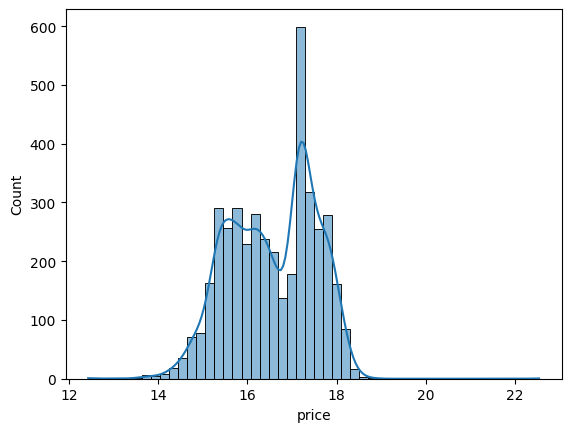

In [1598]:
sns.histplot(np.log1p(df['price']), bins=50, kde= True)

<Axes: xlabel='price'>

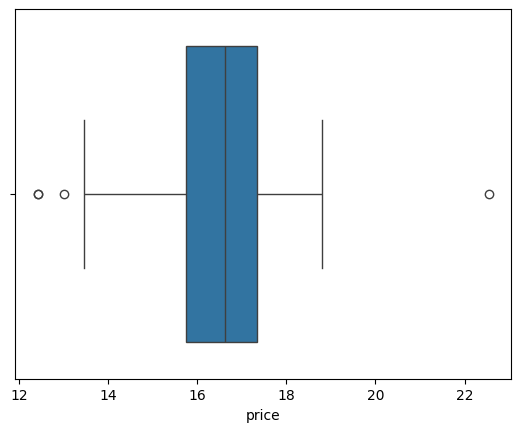

In [1599]:
sns.boxplot(x=np.log1p(df_cleaned['price']))

In [1600]:
df_cleaned.loc[:,'price'] = np.log1p(df_cleaned['price'])

In [1601]:
np.log1p(df_cleaned['area_sqft']).skew()

np.float64(-0.4845579020361784)

<Axes: xlabel='area_sqft', ylabel='Count'>

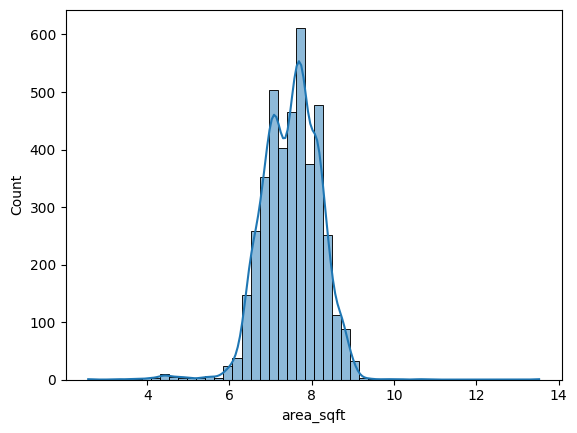

In [1602]:
sns.histplot(np.log1p(df['area_sqft']), bins=50, kde=True)

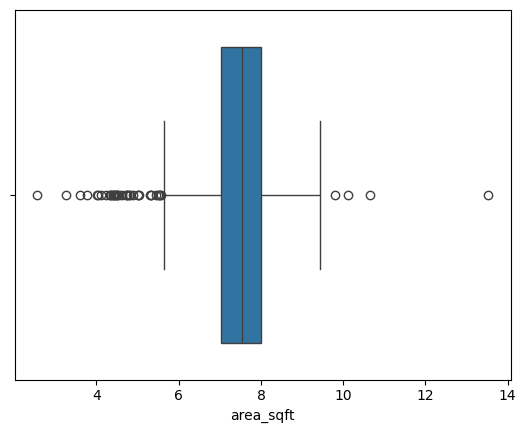

In [1603]:
sns.boxplot(x=np.log1p(df_cleaned['area_sqft']))
plt.show()

In [1604]:
df_cleaned.loc[:,'area_sqft'] = np.log1p(df_cleaned['area_sqft'])

In [1605]:
df['BHK'].skew()

np.float64(-0.2257632340807098)

<Axes: xlabel='BHK', ylabel='Count'>

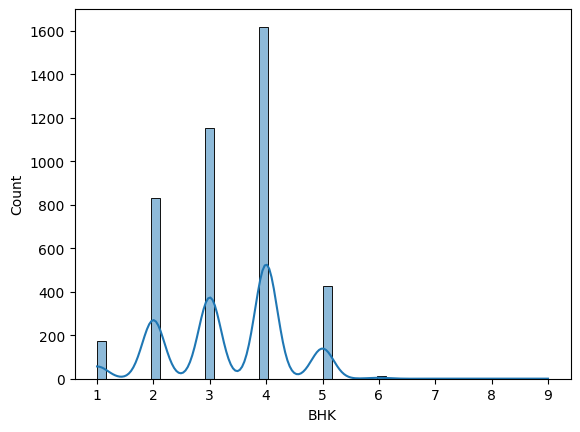

In [1606]:
sns.histplot(df['BHK'], bins=50, kde= True)

<Axes: xlabel='BHK'>

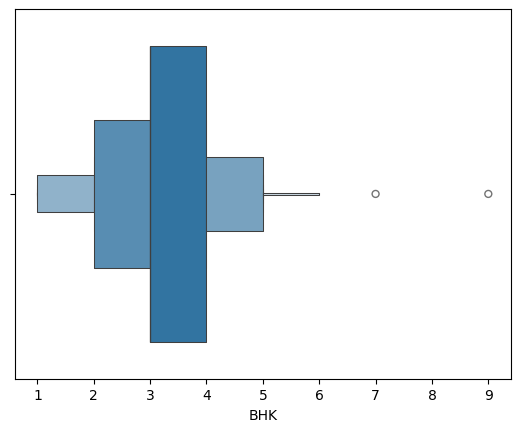

In [1607]:
sns.boxenplot(x=(df_cleaned['BHK']))

In [1608]:
categorical_col = df.select_dtypes(include=['object', 'category']).columns
print(categorical_col)

Index(['type_area', 'status', 'transaction', 'furnishing', 'Building',
       'locality'],
      dtype='object')


In [1609]:
print(f"removed : {len(df)} and df_cleaned: {len(df_cleaned)}")

removed : 4219 and df_cleaned: 4186


<Axes: xlabel='area_sqft'>

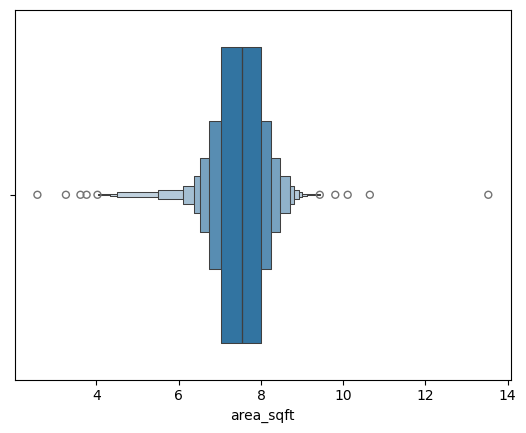

In [1610]:
# sns.boxplot(x=df_cleaned['price'])
sns.boxenplot(x=df_cleaned['area_sqft'])

In [1611]:
# the columns area_sqft and price are in log1p form

In [1612]:
df_cleaned = df_cleaned.rename(columns={'furnishing':'furninshed', 'BHK':'bhk', 'type_area':'area_type', 'transaction':'new_property'})

In [1613]:
df_cleaned.sample(5)

,area_type,status,new_property,furninshed,price,bhk,Building,locality,area_sqft
3333,carpet area,ready,Resale,Unfurnished,16.883564,4,Galaxy Gala Laxuria,South Bopal Bopal,7.824446
2107,carpet area,ready,Resale,Unfurnished,15.761421,3,Shyamdeep Residency,Navjivan Navrangpura,6.909753
4113,carpet area,ready,New Property,Unfurnished,16.864784,4,Kavisha The Portrait,Shela,7.638680
5427,super area,ready,Resale,Unfurnished,17.118728,4,Riviera Elite,Shela,8.171599
4656,carpet area,ready,New Property,Unfurnished,17.318060,4,Jodhpur Village,Jodhpur,7.868254


# data export to the csv file for training on another notebook


In [ ]:
# df_cleaned.to_csv('cleaned_data.csv', index=False)

In [ ]:
# import pandas as pd
# import json

# # Example cleaned DataFrame
# df_cleaned = pd.read_csv("cleaned_data.csv")

# # Categorical features JSON
# cat_features = df_cleaned.select_dtypes(include=['object', 'category']).columns
# cat_dict = {col: df_cleaned[col].dropna().unique().tolist() for col in cat_features}

# with open("categorical_features.json", "w") as f:
#     json.dump(cat_dict, f, indent=4)

# # Numeric features JSON
# num_features = df_cleaned.select_dtypes(include=['int64', 'float64']).columns.tolist()
# num_dict = {col: {"min": int(df_cleaned[col].min()), "max": int(df_cleaned[col].max()), "mean": float(df_cleaned[col].mean())} for col in num_features}

# with open("numeric_features.json", "w") as f:
#     json.dump(num_dict, f, indent=4)
